In [119]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
sourcedata = '../SourceData/DataScienceSalary_Scrubbed.csv'
df = pd.read_csv(sourcedata)
df = df.drop(columns=['Unnamed: 0'])
print(df.head(10))

   YEAR   EXPERIENCE EMPLOYMENT                      TITLE LOCATION  \
0  2023  Entry Level  Full time          Applied Scientist       US   
1  2023  Entry Level  Full time          Applied Scientist       US   
2  2023  Entry Level  Full time       Data Quality Analyst       NG   
3  2023  Entry Level  Full time    Compliance Data Analyst       NG   
4  2023  Entry Level  Full time          Applied Scientist       US   
5  2023  Entry Level  Full time          Applied Scientist       US   
6  2023  Entry Level  Full time  Machine Learning Engineer       US   
7  2023  Entry Level  Full time  Machine Learning Engineer       US   
8  2023  Entry Level  Full time         Research Scientist       US   
9  2023  Entry Level  Full time              Data Engineer       US   

  COMPANYSIZE  SALARY  
0       Large  213660  
1       Large  130760  
2       Large  100000  
3       Large   30000  
4       Large  204620  
5       Large  110680  
6      Medium  163196  
7      Medium  145885  
8 

In [121]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [122]:
from sklearn.preprocessing import OneHotEncoder
#Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [123]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


In [124]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([one_hot_df,df], axis=1)
df_encoded

EXPERIENCE_Entry Level  EXPERIENCE_Experienced  EXPERIENCE_Mid Level  \
0                        1.0                     0.0                   0.0   
1                        1.0                     0.0                   0.0   
2                        1.0                     0.0                   0.0   
3                        1.0                     0.0                   0.0   
4                        1.0                     0.0                   0.0   
...                      ...                     ...                   ...   
2405                     0.0                     0.0                   0.0   
2406                     0.0                     0.0                   0.0   
2407                     0.0                     0.0                   0.0   
2408                     0.0                     0.0                   0.0   
2409                     0.0                     0.0                   0.0   

      EXPERIENCE_Senior  EMPLOYMENT_Contractor  EMPLOYMENT_Freelancer  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   
...                 ...                    ...                    ...   
2405                1.0                    0.0                    0.0   
2406                1.0                    0.0                    0.0   
2407                1.0                    0.0                    0.0   
2408                1.0                    0.0                    0.0   
2409                1.0                    0.0                    0.0   

      EMPLOYMENT_Full time  EMPLOYMENT_Part time  \
0                      1.0                   0.0   
1                      1.0                   0.0   
2                      1.0                   0.0   
3                      1.0                   0.0   
4                      1.0                   0.0   
...                    ...                   ...   
2405                   1.0                   0.0   
2406                   1.0                   0.0   
2407                   1.0                   0.0   
2408                   1.0                   0.0   
2409                   1.0                   0.0   

      TITLE_3D Computer Vision Researcher  TITLE_AI Developer  ...  \
0                                     0.0                 0.0  ...   
1                                     0.0                 0.0  ...   
2                                     0.0                 0.0  ...   
3                                     0.0                 0.0  ...   
4                                     0.0                 0.0  ...   
...                                   ...                 ...  ...   
2405                                  0.0                 0.0  ...   
2406                                  0.0                 0.0  ...   
2407                                  0.0                 0.0  ...   
2408                                  0.0                 0.0  ...   
2409                                  0.0                 0.0  ...   

      COMPANYSIZE_Large  COMPANYSIZE_Medium  COMPANYSIZE_Small  YEAR  \
0                   1.0                 0.0                0.0  2023   
1                   1.0                 0.0                0.0  2023   
2                   1.0                 0.0                0.0  2023   
3                   1.0                 0.0                0.0  2023   
4                   1.0                 0.0                0.0  2023   
...                 ...                 ...                ...   ...   
2405                0.0                 1.0                0.0  2020   
2406                0.0                 0.0                1.0  2020   
2407                0.0                 1.0                0.0  2020   
2408  

In [125]:
# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
      EXPERIENCE_Entry Level  EXPERIENCE_Experienced  EXPERIENCE_Mid Level  \
0                        1.0                     0.0                   0.0   
1                        1.0                     0.0                   0.0   
2                        1.0                     0.0                   0.0   
3                        1.0                     0.0                   0.0   
4                        1.0                     0.0                   0.0   
...                      ...                     ...                   ...   
2405                     0.0                     0.0                   0.0   
2406                     0.0                     0.0                   0.0   
2407                     0.0                     0.0                   0.0   
2408                     0.0                     0.0                   0.0   
2409                     0.0                     0.0                   0.0   

      EXPERIENCE_Senior  EMPLOYMENT_Co

In [126]:
X = df_encoded.iloc[:,:-1].values
y = df_encoded.iloc[:,-1].values

In [127]:
print(X.shape)
print(y.shape)

(2410, 177)
(2410,)


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [129]:
from sklearn.linear_model  import LinearRegression
#reg = RandomForestRegressor(max_depth=2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

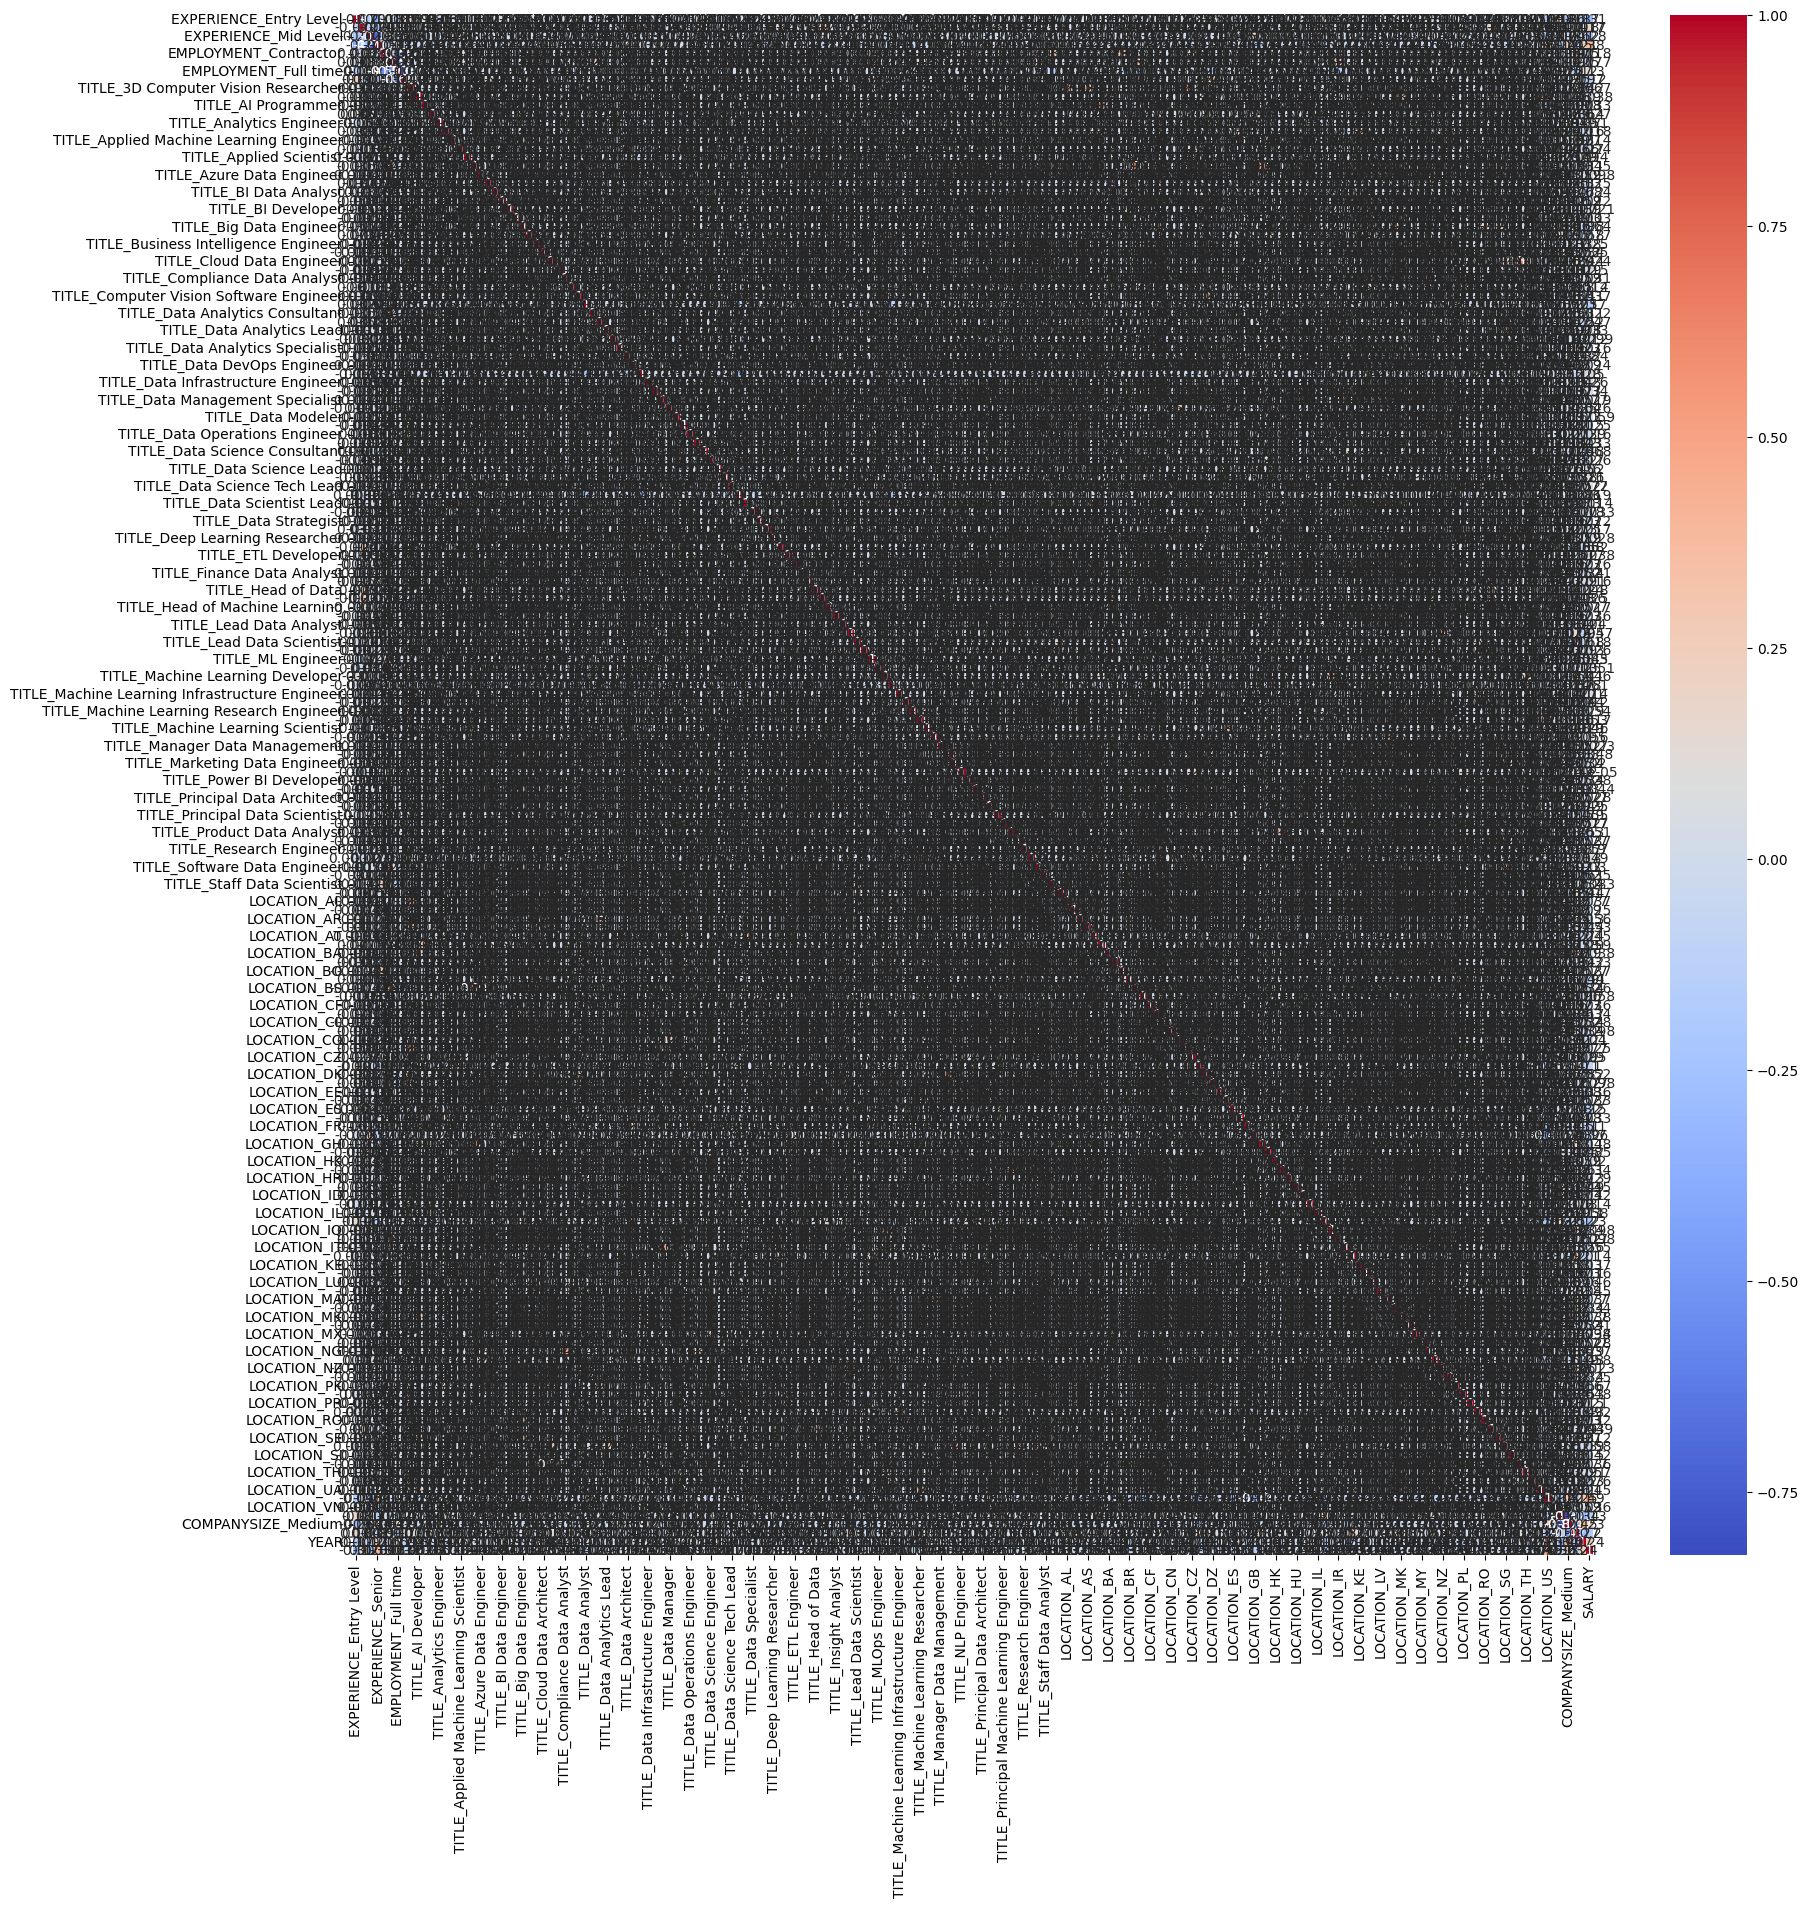

In [139]:
# corelation matrix with heatmap
df_encoded.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [130]:
df_encoded

EXPERIENCE_Entry Level  EXPERIENCE_Experienced  EXPERIENCE_Mid Level  \
0                        1.0                     0.0                   0.0   
1                        1.0                     0.0                   0.0   
2                        1.0                     0.0                   0.0   
3                        1.0                     0.0                   0.0   
4                        1.0                     0.0                   0.0   
...                      ...                     ...                   ...   
2405                     0.0                     0.0                   0.0   
2406                     0.0                     0.0                   0.0   
2407                     0.0                     0.0                   0.0   
2408                     0.0                     0.0                   0.0   
2409                     0.0                     0.0                   0.0   

      EXPERIENCE_Senior  EMPLOYMENT_Contractor  EMPLOYMENT_Freelancer  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   
...                 ...                    ...                    ...   
2405                1.0                    0.0                    0.0   
2406                1.0                    0.0                    0.0   
2407                1.0                    0.0                    0.0   
2408                1.0                    0.0                    0.0   
2409                1.0                    0.0                    0.0   

      EMPLOYMENT_Full time  EMPLOYMENT_Part time  \
0                      1.0                   0.0   
1                      1.0                   0.0   
2                      1.0                   0.0   
3                      1.0                   0.0   
4                      1.0                   0.0   
...                    ...                   ...   
2405                   1.0                   0.0   
2406                   1.0                   0.0   
2407                   1.0                   0.0   
2408                   1.0                   0.0   
2409                   1.0                   0.0   

      TITLE_3D Computer Vision Researcher  TITLE_AI Developer  ...  \
0                                     0.0                 0.0  ...   
1                                     0.0                 0.0  ...   
2                                     0.0                 0.0  ...   
3                                     0.0                 0.0  ...   
4                                     0.0                 0.0  ...   
...                                   ...                 ...  ...   
2405                                  0.0                 0.0  ...   
2406                                  0.0                 0.0  ...   
2407                                  0.0                 0.0  ...   
2408                                  0.0                 0.0  ...   
2409                                  0.0                 0.0  ...   

      LOCATION_TH  LOCATION_TR  LOCATION_UA  LOCATION_US  LOCATION_VN  \
0             0.0          0.0          0.0          1.0          0.0   
1             0.0          0.0          0.0          1.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          1.0          0.0   
...           ...          ...          ...          ...          ...   
2405          0.0          0.0          0.0          0.0          0.0   
2406          0.0          0.0          0.0          0.0          0.0   
2407          0.0          0.0          0.0          1.0          0.0

In [131]:
y_pred = reg.predict(X_test)
y_pred

array([ 1.48864000e+05,  2.00192000e+05,  1.56288000e+05,  1.09184000e+05,
        1.65632000e+05,  1.34528000e+05,  1.34144000e+05,  1.89056000e+05,
        5.42720000e+04, -5.80602383e+15,  9.13920000e+04,  1.79200000e+05,
        1.78176000e+05,  1.14432000e+05,  1.15328000e+05,  6.29760000e+04,
        1.37216000e+05,  1.58208000e+05,  7.78240000e+04,  1.28000000e+05,
        1.31072000e+05,  1.91360000e+05,  1.65632000e+05,  1.18912000e+05,
        8.42240000e+04,  1.67040000e+05,  3.58400000e+04,  1.85344000e+05,
        6.48960000e+04,  1.65632000e+05,  4.60128261e+14, -3.40480000e+04,
        8.42240000e+04,  4.48000000e+04,  9.30560000e+04,  7.11680000e+04,
        1.89440000e+04,  1.67040000e+05,  3.55840000e+04,  4.63360000e+04,
        9.58720000e+04,  8.17920000e+04,  1.37856000e+05,  1.28000000e+05,
        1.60896000e+05,  4.68480000e+04,  1.01888000e+05,  6.65600000e+03,
        7.55200000e+03,  1.09568000e+05,  1.58208000e+05,  1.31072000e+05,
        1.16608000e+05,  

In [132]:
reg.score(X_train,y_train)

0.5127621135631382

In [133]:
#Check Model Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score
import numpy as np
score_r2 =r2_score(y_test,y_pred)
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)

R2 -5.820287932599084e+20
Mean Abs 161995498264877.8
Mean Square 2.704355240903088e+30
Root Mean Square 1644492396122003.2


In [134]:
df_encoded['EXPERIENCE_Entry Level']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2405    0.0
2406    0.0
2407    0.0
2408    0.0
2409    0.0
Name: EXPERIENCE_Entry Level, Length: 2410, dtype: float64

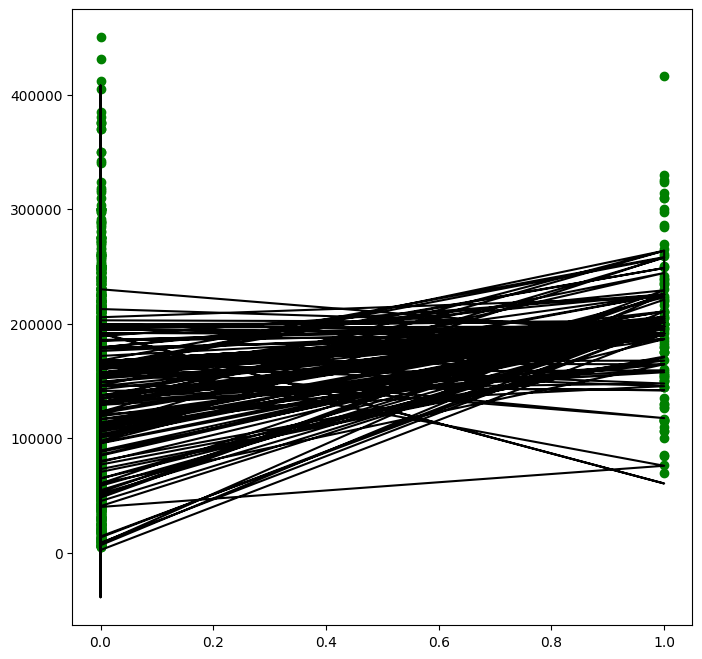

In [135]:
#Plot the Predicted and Actual values on test data
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,1], y_train,color='g')
plt.plot(X_train[:,1],reg.predict(X_train),color='k')
#plt.xticks(range(len(X_test)),df['X_test'],rotation=45,ha='right')
#plt.xlim(0,10)
plt.show()

In [136]:
y_pred=reg.predict(X_test)

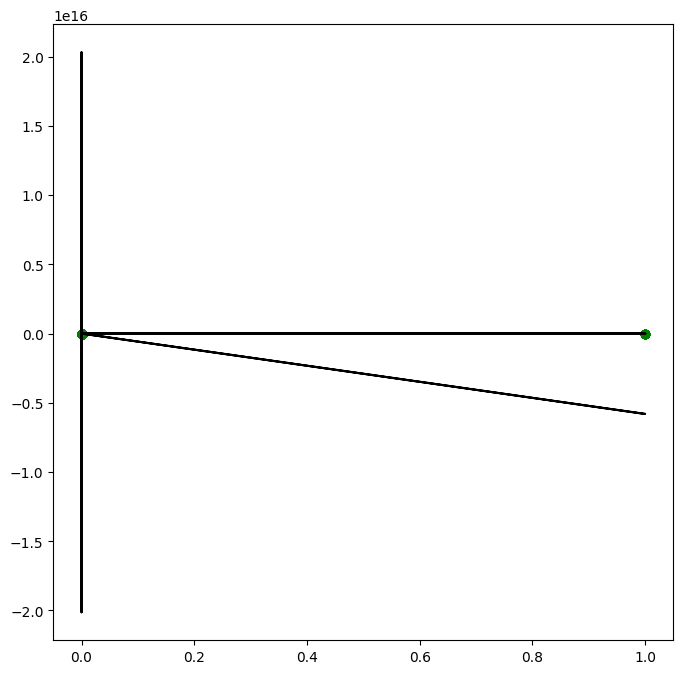

In [137]:
#Plot the Predicted and Actual values on test data
plt.figure(figsize=(8,8))
plt.scatter(X_test[:,1], y_test,color='g')
plt.plot(X_test[:,1],reg.predict(X_test),color='k')
#plt.xticks(range(len(X_test)),df['X_test'],rotation=45,ha='right')
#plt.xlim(0,10)
plt.show()

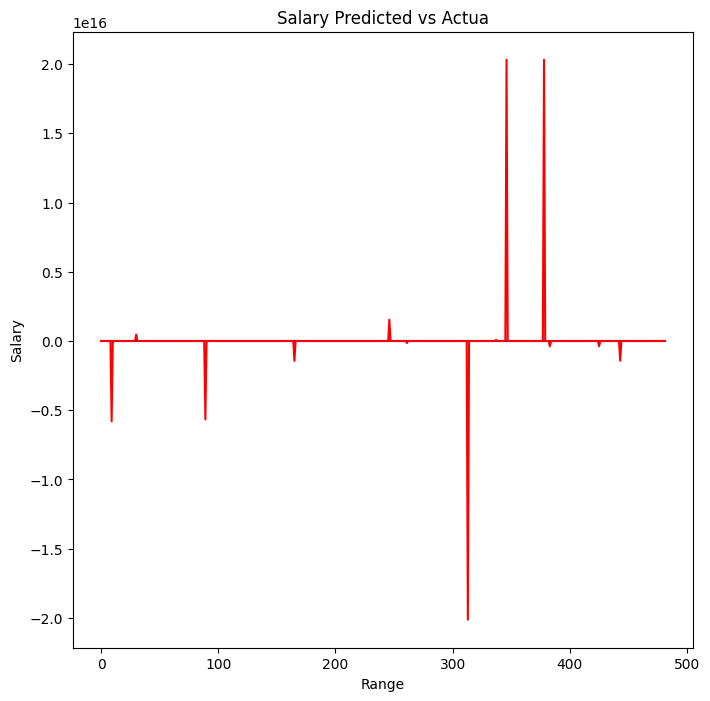

In [138]:
#Plot the Predicted vs Actual values on test data
plt.figure(figsize=(8,8))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.title('Salary Predicted vs Actua')
plt.xlabel('Range')
plt.ylabel('Salary')
plt.show()